In [17]:
from collections import defaultdict
import itertools
import string
import re

import matplotlib.pyplot as plt
import nltk
import numpy as np

import sys
sys.path.append('..')
from text_recognizer.datasets.emnist_lines import EmnistLinesDataset, construct_image_from_string
from text_recognizer.datasets.sentences import SentenceGenerator

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
np.random.seed(42)

## String together words

In [19]:
dataset = EmnistLinesDataset()

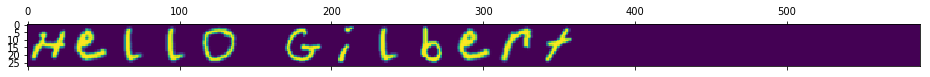

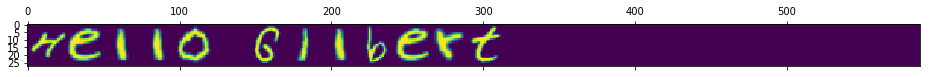

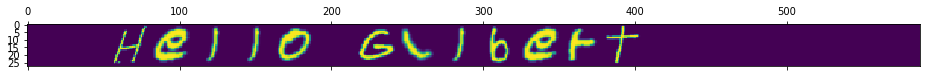

In [20]:
def samples_by_char(samples, labels, mapping):
    samples_by_char = defaultdict(list)
    for sample, label in zip(samples, labels.flatten()):
        samples_by_char[mapping[label]].append(sample)
    return samples_by_char

samples_by_char_train = samples_by_char(
    dataset.emnist.x_train,
    dataset.emnist.y_train_int,
    dataset.emnist.mapping
)

plt.matshow(construct_image_from_string('Hello Gilbert________', samples_by_char_train, max_overlap=0))
plt.matshow(construct_image_from_string('Hello Gilbert________', samples_by_char_train, max_overlap=0.33))
plt.matshow(construct_image_from_string('__Hello Gilbert______', samples_by_char_train, max_overlap=0.33))

## Get it to work on sequences of fixed length

To get it to work on sequences of fixed length and overlap, we need to time-distribute the convnet over windows of the image, and write a custom loss function that sums the loss of each letter.

In [21]:
sentence_generator = SentenceGenerator()

comfortable being straight They_
(28, 896)


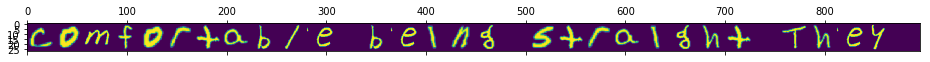

In [28]:
max_length = 32
sample_string = sentence_generator.generate(max_length)
print(sample_string)
sample_image = construct_image_from_string(sample_string, samples_by_char_train, max_overlap=0)
print(sample_image.shape)
plt.matshow(sample_image)

(28, 896)


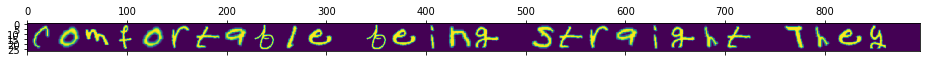

In [30]:
sample_image = construct_image_from_string(sample_string, samples_by_char_train, max_overlap=0.33)
print(sample_image.shape)
plt.matshow(sample_image)

In [37]:
dataset.load_or_generate_data()

EmnistLinesDataset generating data...
EmnistLinesDataset saving data to HDF5...


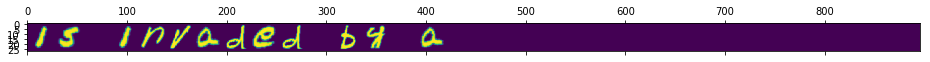

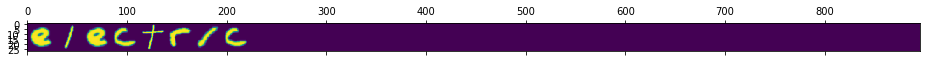

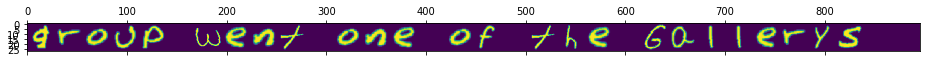

In [40]:
plt.matshow(dataset.x_train[0])
plt.matshow(dataset.x_train[1])
plt.matshow(dataset.x_train[2])

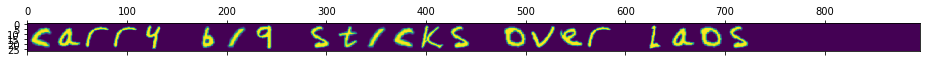

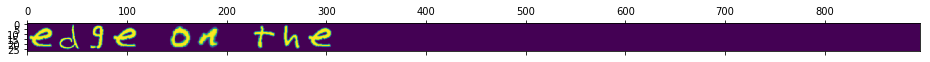

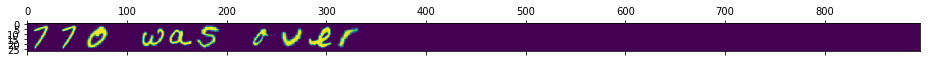

In [41]:
plt.matshow(dataset.x_test[0])
plt.matshow(dataset.x_test[1])
plt.matshow(dataset.x_test[2])